# Objective:
 The objective of this project is to perfom data analysis using sql and python on imdb sqlite data set to observe the performance of movies at global box- office from the last five decades and provide the insights on audience likes and dislikes, movie performance and popularity, impact of directors on the movie performance, etc.

### Importing Libraries
The following Libraries are installed to perform EDA and Data Analysis.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Establishing connection with Database
* establishing a connection to the sqlite database by creating a connection
* creating a cursor using a cursor object
* cursor_object.execute(query)
* fetch the data- fetchall()

In [27]:
db = r"C:\Users\vamsh\Downloads\Data Analysis Projects\Data Analysis with SQL & Python\movies.sqlite"
conn = sqlite3.connect(db)

In [28]:
cur = conn.cursor()

In [29]:
cur.execute('select * from movies')
movies = cur.fetchall()

### Writing Queries in SQL.
To understand and analyze the data multiple quaries have been written.

In [30]:
movies

[(43597,
  'Avatar',
  237000000,
  150,
  '2009-12-10',
  2787965087,
  'Avatar',
  7.2,
  11800,
  'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
  'Enter the World of Pandora.',
  19995,
  4762),
 (43598,
  "Pirates of the Caribbean: At World's End",
  300000000,
  139,
  '2007-05-19',
  961000000,
  "Pirates of the Caribbean: At World's End",
  6.9,
  4500,
  'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.',
  'At the end of the world, the adventure begins.',
  285,
  4763),
 (43599,
  'Spectre',
  245000000,
  107,
  '2015-10-26',
  880674609,
  'Spectre',
  6.3,
  4466,
  'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service 

In [31]:
movies = pd.DataFrame(movies, columns =['id','original_title','budget','popularity','release_date','revenue','title'
                                       ,'vote_average','vote_count','overview','tagline','uid','director_id'
                                      ])

In [32]:
movies

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485
4770,48397,"Signed, Sealed, Delivered",0,1,2013-10-13,0,"Signed, Sealed, Delivered",7.0,6,"""Signed, Sealed, Delivered"" introduces a dedic...",None,231617,7108
4771,48398,Shanghai Calling,0,0,2012-05-03,0,Shanghai Calling,5.7,7,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,126186,7109


In [33]:
cur.execute('select * from directors')
directors = cur.fetchall()

In [34]:
directors = pd.DataFrame(directors,columns=['name','id','gender','uid','department'])

In [35]:
directors

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing
...,...,...,...,...,...
2344,Shane Carruth,7106,2,76624,Directing
2345,Neill Dela Llana,7107,0,1174437,Directing
2346,Scott Smith,7108,0,1219158,Directing
2347,Daniel Hsia,7109,2,208138,Directing


In [16]:
##### check how many movies are present in the data
cur.execute('select count(Title) from movies')
cur.fetchall()

[(4773,)]

In [36]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   uid         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4773 non-null   int64  
 1   original_title  4773 non-null   object 
 2   budget          4773 non-null   int64  
 3   popularity      4773 non-null   int64  
 4   release_date    4773 non-null   object 
 5   revenue         4773 non-null   int64  
 6   title           4773 non-null   object 
 7   vote_average    4773 non-null   float64
 8   vote_count      4773 non-null   int64  
 9   overview        4770 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             4773 non-null   int64  
 12  director_id     4773 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 484.9+ KB


In [38]:
## find the data of these three directors : James Cameron, Luc Besson, John Woo
cur.execute("select * from directors where name in ('James Cameron','Luc Besson','John Woo')")
cur.execute("select * from directors where name =='James Cameron' or name == 'Luc Besson' or name =='John Woo'")
cur.fetchall()

[('James Cameron', 4762, 2, 2710, 'Directing'),
 ('John Woo', 4893, 2, 11401, 'Directing'),
 ('Luc Besson', 4949, 2, 59, 'Directing')]

In [39]:
## find all the directors with name starting with 'Steven'
cur.execute('select * from directors where name like "steven%"')
cur.fetchall()

[('Steven Spielberg', 4799, 2, 488, 'Directing'),
 ('Steven Soderbergh', 4909, 2, 1884, 'Directing'),
 ('Steven Brill', 5013, 2, 32593, 'Directing'),
 ('Steven Zaillian', 5117, 2, 2260, 'Directing'),
 ('Steven Quale', 5216, 2, 93214, 'Directing'),
 ('Steven Seagal', 5221, 2, 23880, 'Directing'),
 ('Steven E. de Souza', 5390, 2, 1726, 'Directing'),
 ('Steven Shainberg', 5803, 2, 67795, 'Directing'),
 ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]

In [40]:
### 1 is for females - how many female directors
cur.execute('select count(id) from directors where gender=1')
cur.fetchall()

[(150,)]

In [41]:
## the name of the 10th women director
cur.execute('select name from directors where gender=1 limit 10')
cur.fetchall()[-1]

('Angelina Jolie',)

In [43]:
### what are the 10 most popular movies
cur.execute('select original_title from movies order by popularity Desc limit 10')
cur.fetchall()

[('Minions',),
 ('Interstellar',),
 ('Deadpool',),
 ('Guardians of the Galaxy',),
 ('Mad Max: Fury Road',),
 ('Jurassic World',),
 ('Pirates of the Caribbean: The Curse of the Black Pearl',),
 ('Dawn of the Planet of the Apes',),
 ('The Hunger Games: Mockingjay - Part 1',),
 ('Big Hero 6',)]

In [44]:
## what is the most awarded average rated movie since jan 1st 2000.
cur.execute('select original_title from movies where release_date > "2000-01-01" order by vote_average desc limit 1')
cur.fetchall()

[('Sardaarji',)]

In [45]:
### which movies were directed by Brenda Chapman?
cur.execute('select original_title from movies join directors on directors.id = movies.director_id where directors.name = "Brenda Chapman"')
cur.fetchall()

[('Brave',)]

In [46]:
## name of the director who has made most number of movies
cur.execute('select name from directors join movies on directors.id = movies.director_id group by director_id order by count(movies.id) desc limit 1')
cur.fetchall()

[('Steven Spielberg',)]

In [47]:
## most bankable directors
cur.execute("select name from directors join movies on directors.id = movies.director_id group by director_id order by sum(budget) desc limit 5")
cur.fetchall()

[('Steven Spielberg',),
 ('Michael Bay',),
 ('Peter Jackson',),
 ('Ridley Scott',),
 ('Bryan Singer',)]

In [48]:
### tell evrything about top 10 highest budget making movies
cur.execute("select * from movies join directors on movies.director_id= directors.id order by budget desc limit 10")
pd.DataFrame(cur.fetchall())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,43614,Pirates of the Caribbean: On Stranger Tides,380000000,135,2011-05-14,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Captain Jack Sparrow crosses paths with a woma...,Live Forever Or Die Trying.,1865,4775,Rob Marshall,4775,2,17633,Directing
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763,Gore Verbinski,4763,2,1704,Directing
2,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769,Joss Whedon,4769,2,12891,Directing
3,43607,Superman Returns,270000000,57,2006-06-28,391081192,Superman Returns,5.4,1400,Superman returns to discover his 5-year absenc...,None,1452,4772,Bryan Singer,4772,2,9032,Directing
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766,Andrew Stanton,4766,2,7,Directing
5,43603,Tangled,260000000,48,2010-11-24,591794936,Tangled,7.4,3330,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,38757,4768,Byron Howard,4768,2,76595,Directing
6,43602,Spider-Man 3,258000000,115,2007-05-01,890871626,Spider-Man 3,5.9,3576,The seemingly invincible Spider-Man goes up ag...,The battle within.,559,4767,Sam Raimi,4767,2,7623,Directing
7,43610,The Lone Ranger,255000000,49,2013-07-03,89289910,The Lone Ranger,5.9,2311,The Texas Rangers chase down a gang of outlaws...,Never Take Off the Mask,57201,4763,Gore Verbinski,4763,2,1704,Directing
8,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765,Christopher Nolan,4765,2,525,Directing
9,43605,Harry Potter and the Half-Blood Prince,250000000,98,2009-07-07,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"As Harry begins his sixth year at Hogwarts, he...",Dark Secrets Revealed,767,4770,David Yates,4770,2,11343,Directing


### Revenue Analysis

In [49]:
##top 10 revenue making movies
cur.execute('select * from movies order by revenue desc limit 10')
pd.DataFrame(cur.fetchall())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43622,Titanic,200000000,100,1997-11-18,1845034188,Titanic,7.5,7562,"84 years later, a 101-year-old woman named Ros...",Nothing on Earth could come between them.,597,4762
2,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
3,43625,Jurassic World,150000000,418,2015-06-09,1513528810,Jurassic World,6.5,8662,Twenty-two years after the events of Jurassic ...,The park is open.,135397,4783
4,43641,Furious 7,190000000,102,2015-04-01,1506249360,Furious 7,7.3,4176,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,168259,4794
5,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
6,43721,Frozen,150000000,165,2013-11-27,1274219009,Frozen,7.3,5295,Young princess Anna of Arendelle dreams about ...,Only the act of true love will thaw a frozen h...,109445,4844
7,43628,Iron Man 3,200000000,77,2013-04-18,1215439994,Iron Man 3,6.8,8806,When Tony Stark's world is torn apart by a for...,Unleash the power behind the armor.,68721,4784
8,44143,Minions,74000000,875,2015-06-17,1156730962,Minions,6.4,4571,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",211672,5045
9,43623,Captain America: Civil War,250000000,198,2016-04-27,1153304495,Captain America: Civil War,7.1,7241,"Following the events of Age of Ultron, the col...",Divided We Fall,271110,4781


In [50]:
### name all the directors with the number of movies and revenue
cur.execute('select name, count(title), sum(revenue) from movies join directors where movies.director_id = directors.id group by director_id order by sum(revenue) desc limit 5 ')
pd.DataFrame(cur.fetchall(), columns=['name','count','revenue'])

,name,count,revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234


### Data Visualization using Python

In [75]:
movies.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [76]:
directors.head()

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


### Highest Grossing Movies of All Time

In [65]:
total_budget_revenue = movies.groupby('title').agg({'budget': 'sum', 'revenue': 'sum'}).reset_index()

highest_grossing_movies = total_budget_revenue.sort_values(by='revenue', ascending=False).head(10)
highest_grossing_movies

,title,budget,revenue
377,Avatar,237000000,2787965087
4392,Titanic,200000000,1845034188
3413,The Avengers,220000000,1519557910
1916,Jurassic World,150000000,1513528810
1393,Furious 7,190000000,1506249360
378,Avengers: Age of Ultron,280000000,1405403694
1381,Frozen,150000000,1274219009
1833,Iron Man 3,200000000,1215439994
2264,Minions,74000000,1156730962
671,Captain America: Civil War,250000000,1153304495


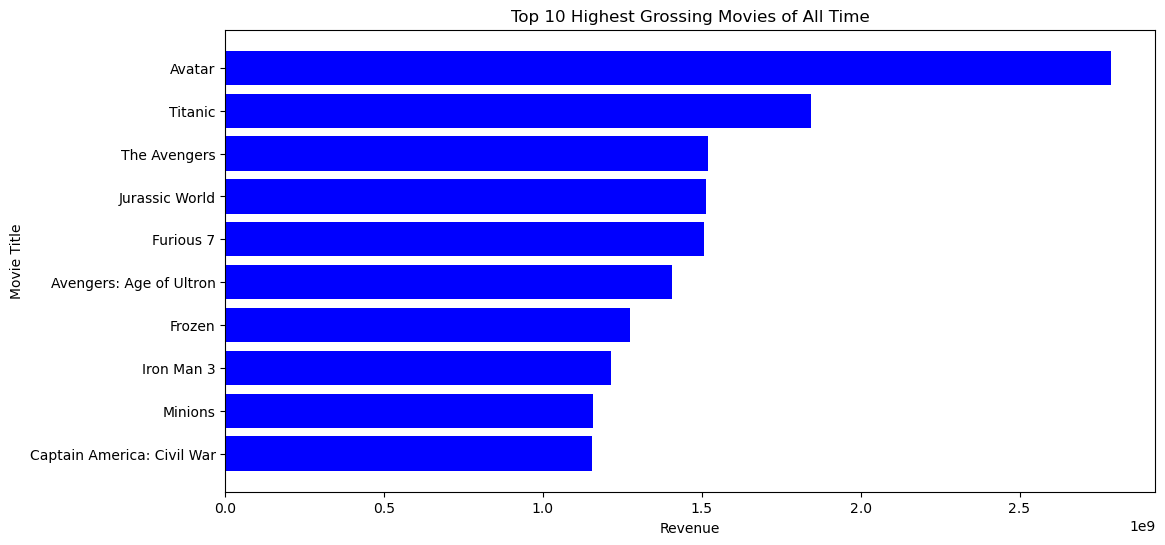

In [74]:
plt.figure(figsize=(12, 6))
plt.barh(highest_grossing_movies['title'], highest_grossing_movies['revenue'], color='blue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Grossing Movies of All Time')
plt.gca().invert_yaxis()  
plt.show()

### Top 10 Popular Movies

In [78]:
popular_movies = movies.nlargest(10, 'popularity')[['title', 'popularity']]
popular_movies

,title,popularity
546,Minions,875
95,Interstellar,724
788,Deadpool,514
94,Guardians of the Galaxy,481
127,Mad Max: Fury Road,434
28,Jurassic World,418
199,Pirates of the Caribbean: The Curse of the Bla...,271
82,Dawn of the Planet of the Apes,243
200,The Hunger Games: Mockingjay - Part 1,206
88,Big Hero 6,203


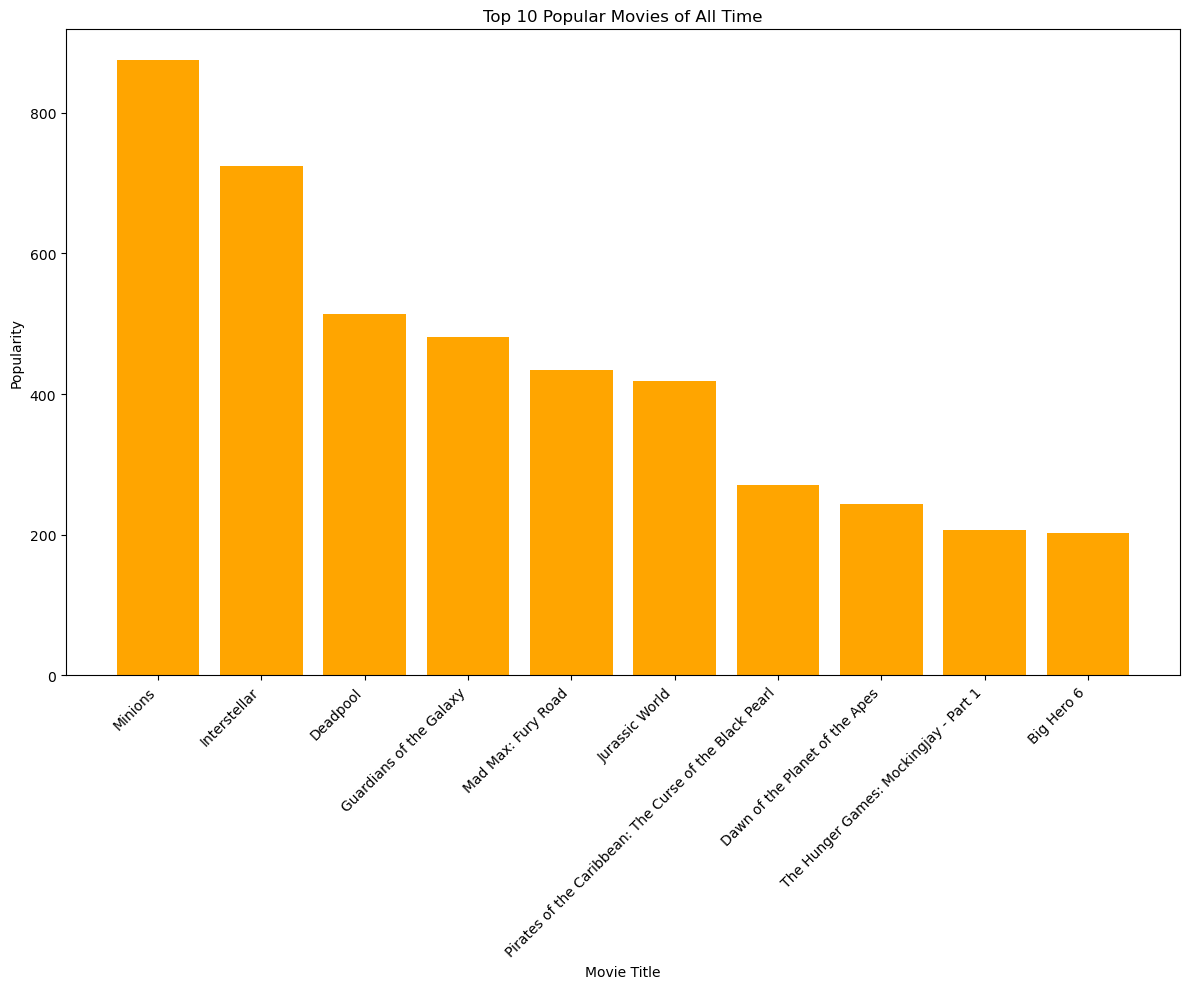

In [84]:
plt.figure(figsize=(12, 10))
plt.bar(popular_movies['title'], popular_movies['popularity'], color='orange')
plt.ylabel('Popularity')
plt.xlabel('Movie Title')
plt.title('Top 10 Popular Movies of All Time')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

### Most Expensive Movies of All Time

In [155]:
most_expensive_movies = movies.sort_values('budget', ascending=False).head(10)
most_expensive_movies

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
17,43614,Pirates of the Caribbean: On Stranger Tides,380000000,135,2011-05-14,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Captain Jack Sparrow crosses paths with a woma...,Live Forever Or Die Trying.,1865,4775
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
7,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
10,43607,Superman Returns,270000000,57,2006-06-28,391081192,Superman Returns,5.4,1400,Superman returns to discover his 5-year absenc...,None,1452,4772
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
6,43603,Tangled,260000000,48,2010-11-24,591794936,Tangled,7.4,3330,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,38757,4768
5,43602,Spider-Man 3,258000000,115,2007-05-01,890871626,Spider-Man 3,5.9,3576,The seemingly invincible Spider-Man goes up ag...,The battle within.,559,4767
13,43610,The Lone Ranger,255000000,49,2013-07-03,89289910,The Lone Ranger,5.9,2311,The Texas Rangers chase down a gang of outlaws...,Never Take Off the Mask,57201,4763
22,43619,The Hobbit: The Desolation of Smaug,250000000,94,2013-12-11,958400000,The Hobbit: The Desolation of Smaug,7.6,4524,"The Dwarves, Bilbo and Gandalf have successful...",Beyond darkness... beyond desolation... lies t...,57158,4777
26,43623,Captain America: Civil War,250000000,198,2016-04-27,1153304495,Captain America: Civil War,7.1,7241,"Following the events of Age of Ultron, the col...",Divided We Fall,271110,4781


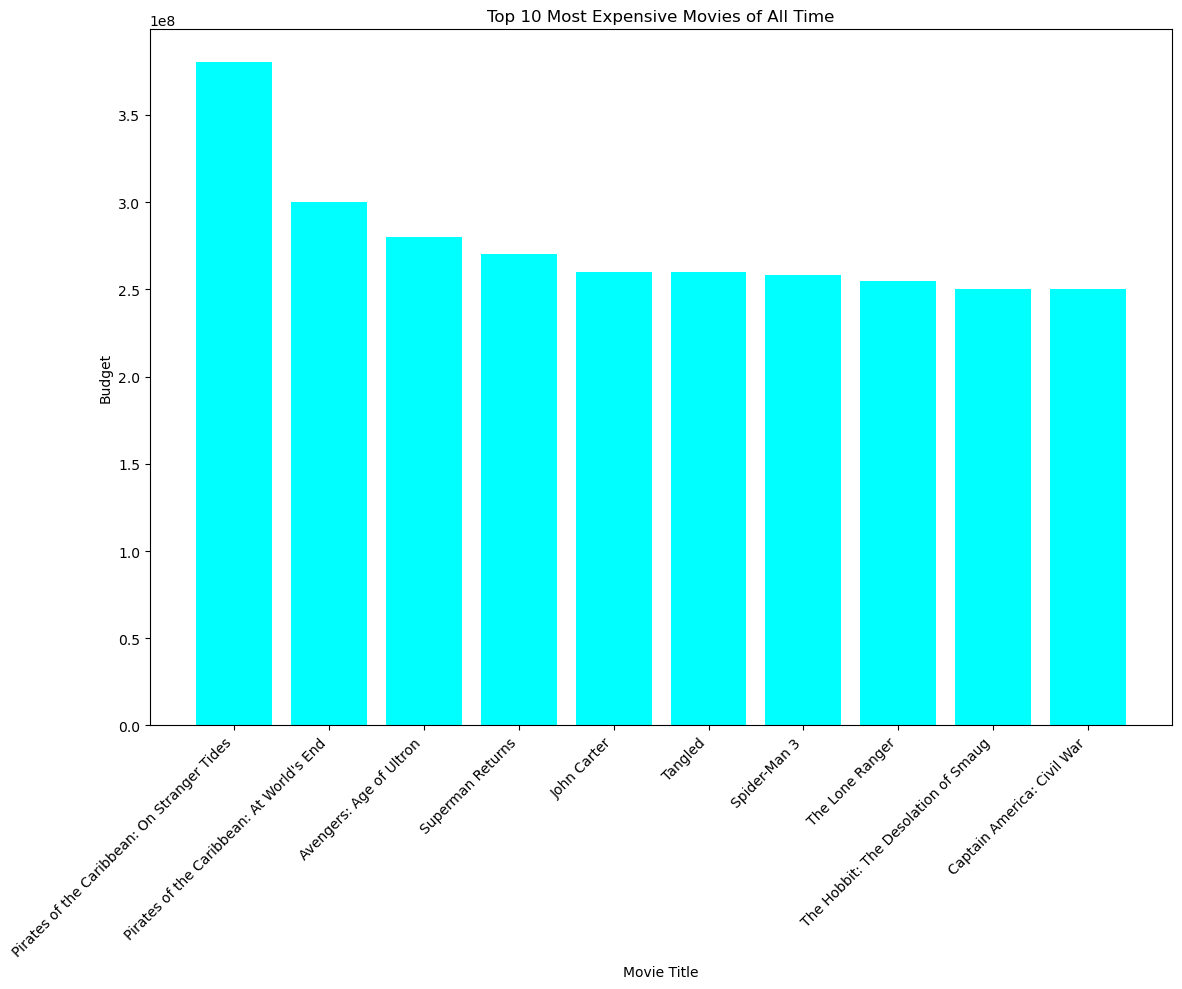

In [92]:

plt.figure(figsize=(12, 10))
plt.bar(most_expensive_movies['title'], most_expensive_movies['budget'], color='cyan')
plt.ylabel('Budget')
plt.xlabel('Movie Title')
plt.title('Top 10 Most Expensive Movies of All Time')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


### Highest Grossing Directors of All Time

In [94]:
movies.head(2)

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763


In [103]:
directors.rename(columns = {'id':'director_id'}, inplace=True)
directors.head(2)

,name,director_id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing


In [119]:
dir_rev = movies.groupby('director_id')['revenue'].sum()
dir_rev = dir_rev.nlargest(10)
dir_rev

director_id
4799    9147393164
4777    6498642820
4762    5883569439
4788    5832524638
4765    4227483234
4885    3725631503
4804    3590622002
4901    3339113893
4785    3337418241
4779    3189557997
Name: revenue, dtype: int64

In [120]:
highest_grossing_directors = dir_rev.reset_index().merge(directors, how='left', on='director_id')
highest_grossing_directors

,director_id,revenue,name,gender,uid,department
0,4799,9147393164,Steven Spielberg,2,488,Directing
1,4777,6498642820,Peter Jackson,2,108,Directing
2,4762,5883569439,James Cameron,2,2710,Directing
3,4788,5832524638,Michael Bay,2,865,Directing
4,4765,4227483234,Christopher Nolan,2,525,Directing
5,4885,3725631503,Chris Columbus,2,10965,Directing
6,4804,3590622002,Robert Zemeckis,2,24,Directing
7,4901,3339113893,George Lucas,2,1,Directing
8,4785,3337418241,Tim Burton,2,510,Directing
9,4779,3189557997,Ridley Scott,2,578,Directing


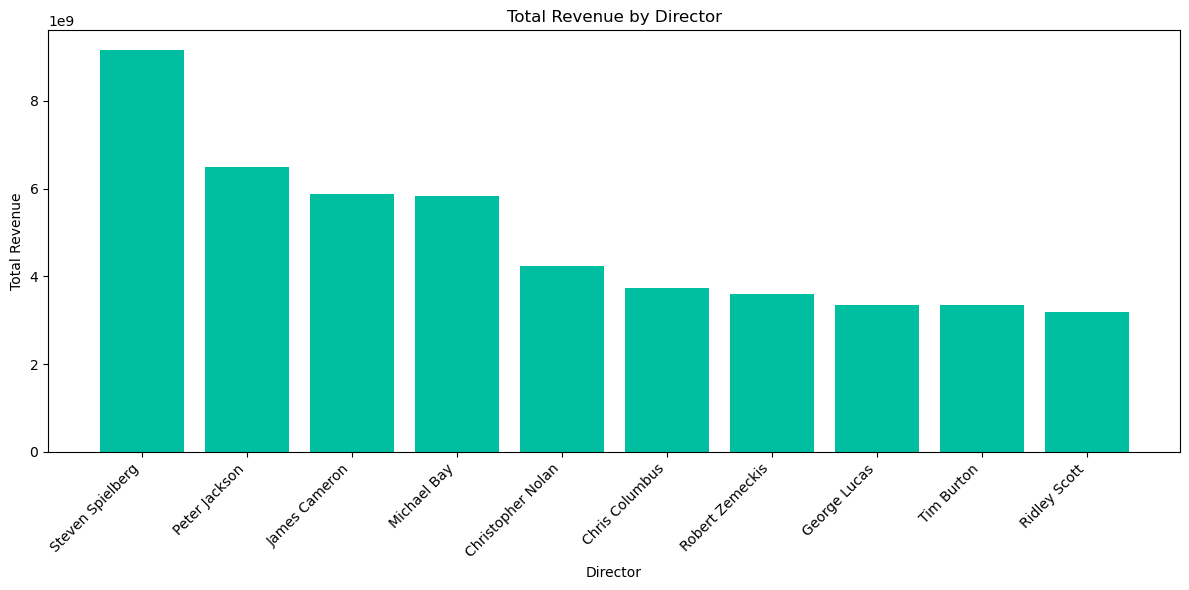

In [121]:
plt.figure(figsize=(12, 6))
plt.bar(highest_grossing_directors['name'], highest_grossing_directors['revenue'], color='#00bfa0')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Director')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


### Highest Grossing Female Directors

In [109]:
directors.head(2)

,name,director_id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing


In [128]:
female_directors = directors[directors['gender'] == 1][['director_id','name']]
female_directors


,director_id,name
39,4801,Brenda Chapman
43,4805,Lilly Wachowski
91,4853,Jennifer Yuh Nelson
208,4970,Kathryn Bigelow
216,4978,Nancy Meyers
...,...,...
2265,7027,Marianna Palka
2266,7028,Ricki Stern
2287,7049,Lynn Shelton
2304,7066,Julie Davis


In [132]:
female_dir_rev = movies.groupby('director_id')['revenue'].sum()
female_dir_rev

director_id
4762    5883569439
4763    3177013357
4764    2713548809
4765    4227483234
4766    2109045355
           ...    
7106        424760
7107             0
7108             0
7109             0
7110             0
Name: revenue, Length: 2349, dtype: int64

In [136]:
highest_grossing_female_directors = female_directors.reset_index().merge(female_dir_rev, how='left', on='director_id')
highest_grossing_female_directors = highest_grossing_female_directors.nlargest(10,'revenue')
highest_grossing_female_directors

,index,director_id,name,revenue
1,43,4805,Lilly Wachowski,1912050101
4,216,4978,Nancy Meyers,1248677472
2,91,4853,Jennifer Yuh Nelson,1186863106
8,290,5052,Betty Thomas,771157747
11,421,5183,Phyllida Lloyd,724798336
20,541,5303,Anne Fletcher,685373124
21,543,5305,Sam Taylor-Johnson,571006128
0,39,4801,Brenda Chapman,538983207
18,531,5293,Catherine Hardwicke,499791787
7,270,5032,Vicky Jenson,373680264


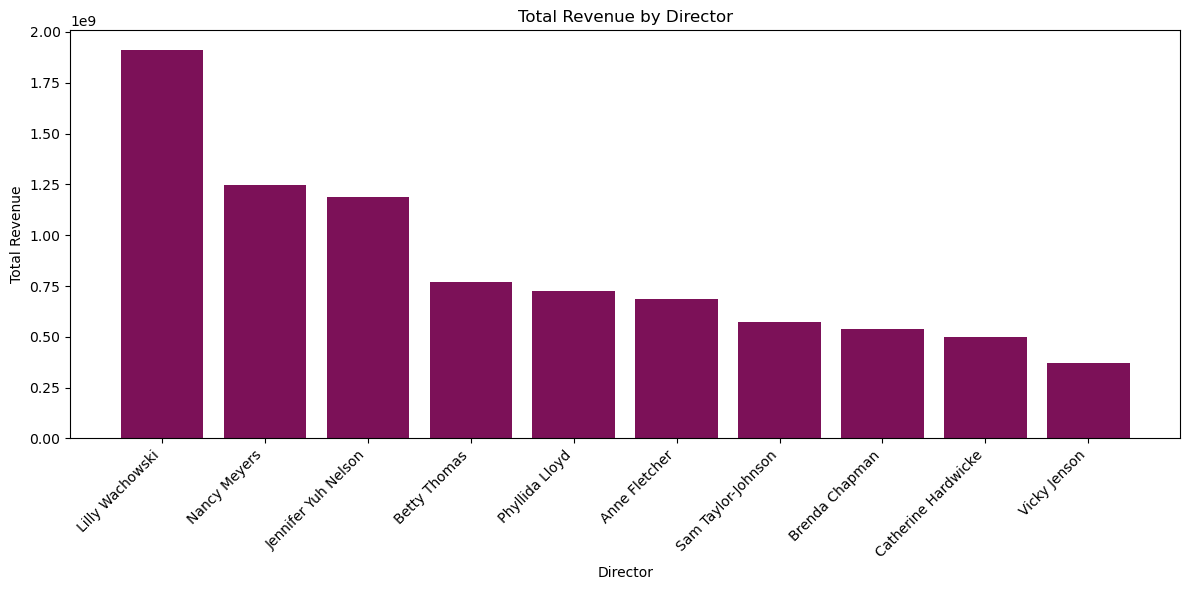

In [138]:
plt.figure(figsize=(12, 6))
plt.bar(highest_grossing_female_directors['name'], highest_grossing_female_directors['revenue'], color='#7c1158')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Director')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

### Most Popular Directors 

In [139]:
movies.head(2)

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763


In [141]:
popular_dir_id = movies.nlargest(10, 'popularity')[['director_id', 'popularity']]
popular_directors = popular_dir_id.reset_index().merge(directors, how='left', on='director_id')
popular_directors

,index,director_id,popularity,name,gender,uid,department
0,546,5045,875,Kyle Balda,0,8023,Directing
1,95,4765,724,Christopher Nolan,2,525,Directing
2,788,5151,514,Tim Miller,2,55252,Directing
3,94,4827,481,James Gunn,2,15218,Directing
4,127,4845,434,George Miller,2,20629,Directing
5,28,4783,418,Colin Trevorrow,2,930707,Directing
6,199,4763,271,Gore Verbinski,2,1704,Directing
7,82,4818,243,Matt Reeves,2,32278,Directing
8,200,4831,206,Francis Lawrence,2,10943,Directing
9,88,4823,203,Chris Williams,2,70238,Directing


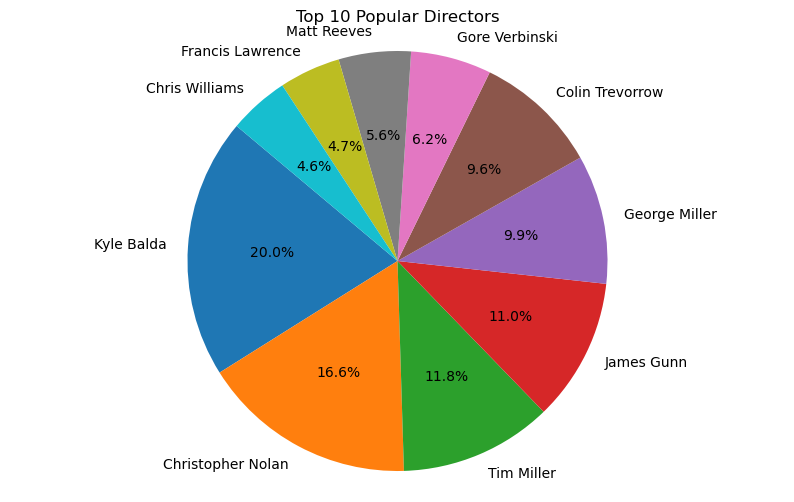

In [146]:
plt.figure(figsize=(10, 6))
plt.pie(popular_directors['popularity'], labels=popular_directors['name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Popular Directors')
plt.show()



### Highest Grossing Movies from 2005

In [149]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
highest_grossing_2005 = movies[movies['release_date'] > '2005-01-01']
highest_grossing_2005 = highest_grossing_2005.nlargest(10, 'revenue')
highest_grossing_2005

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
16,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
28,43625,Jurassic World,150000000,418,2015-06-09,1513528810,Jurassic World,6.5,8662,Twenty-two years after the events of Jurassic ...,The park is open.,135397,4783
44,43641,Furious 7,190000000,102,2015-04-01,1506249360,Furious 7,7.3,4176,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,168259,4794
7,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
124,43721,Frozen,150000000,165,2013-11-27,1274219009,Frozen,7.3,5295,Young princess Anna of Arendelle dreams about ...,Only the act of true love will thaw a frozen h...,109445,4844
31,43628,Iron Man 3,200000000,77,2013-04-18,1215439994,Iron Man 3,6.8,8806,When Tony Stark's world is torn apart by a for...,Unleash the power behind the armor.,68721,4784
546,44143,Minions,74000000,875,2015-06-17,1156730962,Minions,6.4,4571,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",211672,5045
26,43623,Captain America: Civil War,250000000,198,2016-04-27,1153304495,Captain America: Civil War,7.1,7241,"Following the events of Age of Ultron, the col...",Divided We Fall,271110,4781
52,43649,Transformers: Dark of the Moon,195000000,28,2011-06-28,1123746996,Transformers: Dark of the Moon,6.1,3299,Sam Witwicky takes his first tenuous steps int...,The invasion we always feared. An enemy we nev...,38356,4788


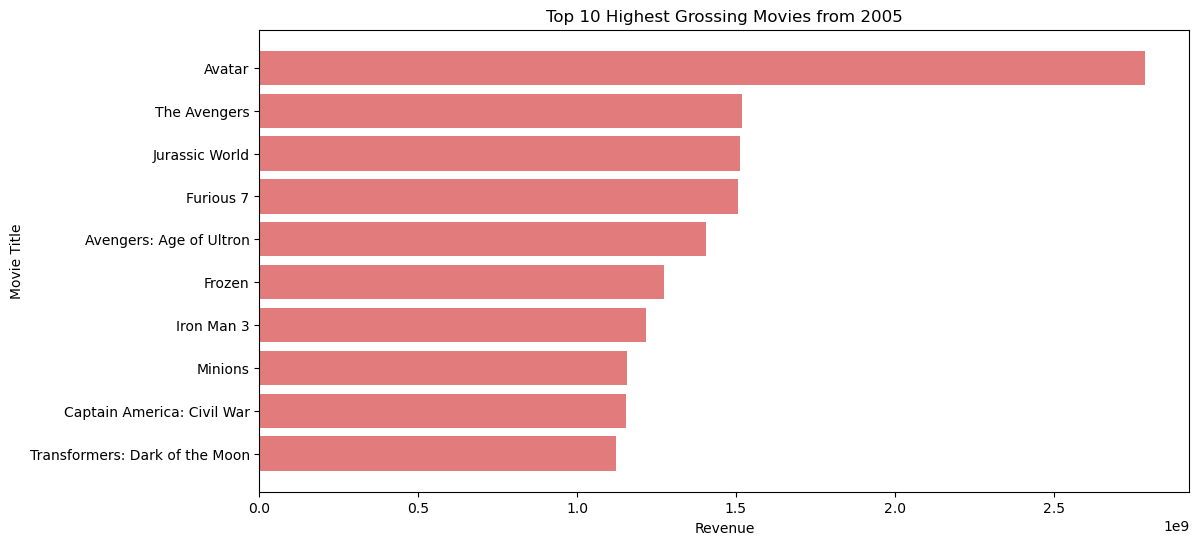

In [150]:
plt.figure(figsize=(12, 6))
plt.barh(highest_grossing_2005['title'], highest_grossing_2005['revenue'], color='#e27c7c')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Grossing Movies from 2005')
plt.gca().invert_yaxis() 
plt.show()

### Lowest Grossing Films

In [153]:
lowest_grossing_films = movies.nsmallest(10, 'revenue')
lowest_grossing_films['release_year'] = lowest_grossing_films['release_date'].dt.year
lowest_grossing_films[['title', 'budget', 'release_year', 'revenue']]

,title,budget,release_year,revenue
83,The Lovers,27000000,2015,0
135,The Wolfman,150000000,2010,0
265,The Cat in the Hat,0,2003,0
309,Son of the Mask,84000000,2005,0
376,Volcano,90000000,1997,0
406,Arthur Christmas,0,2011,0
433,RED 2,84000000,2013,0
453,The Pink Panther,0,2006,0
463,Déjà Vu,0,1998,0
467,Mighty Joe Young,90000000,1998,0


## Interpretation
* Avtar is the highest grossing movie of all time with box-office revenue more than $ 2.7 billion and the only film crossed $ 2 billion mark.


* Avtar and Titanic both directed by James Cameroon stand as the first two highest grossing movies.
* Global Box-office is dominated by Science fiction and super hero movies.
* Frozen is the highest grossing animated film.
* Minions is the most popular film among audience, followed with Intestellar and Deadpool.
* Pirates of the Caribbean: on Stranger Tides is the most expensive film ever made on a budget of $ 380 million.

* Steven Spielberg	is the Highest Grossing Director of all time with a revenue of $ 9.14 billion.

* Steven Spielberg,Peter Jackson, James Cameron, Michael Bay are the only directors whose films grossed more than $5 billion at box-office.

* Lilly Wachowski is the highest grossing Female Director of all time. Lilly Wachowski, Nancy Meyers, Jennifer Yuh Nelson are the only female directors whose moves grossed $ 1 billion mark at box-office.

* Kyle Balda is the most popular director. the list is dominated by the directors whose work is associated with sci-fiction, animation and super hero genre moves.
* Popularity of the director has a great impact on the films performance.
* Big studio movies are doing good box-office business.

# Finished.

* The people of Banglore prefer to order food online, so the suggestion goes to EatWell is to build it in a way that it can serve more online customers.
* The reservation of tables is found quiet less this tells to concentrate more on quality of food than the exteriors.
* The customer Traffic in BTM is quiet high so this can be the best place to set u